In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel("AirlinesData.xlsx")

In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
data.shape

(96, 2)

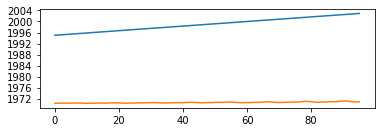

In [6]:
#Line plot
pyplot.subplot(211)
pyplot.plot(data)

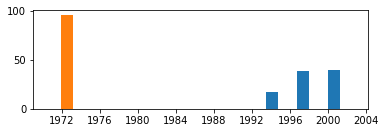

In [7]:
#Histogram
pyplot.subplot(212)
pyplot.hist(data)
pyplot.show()

In [8]:
data['month']=0

In [9]:
data["Month"]=data["Month"].astype("str")

In [10]:
for i in range(96):
    p=data['Month'][i]
    data['month'][i]=p[5:7]

<ipython-input-10-9a33d3e86583>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'][i]=p[5:7]


In [11]:
data1=pd.DataFrame(pd.get_dummies(data['month']))

In [12]:
data1.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
data2=pd.concat([data,data1],axis=1)

In [14]:
data2['t']=np.arange(1,97)

In [15]:
data2['t_squared']=data2['t']*data2['t']

In [16]:
data2['log_passengers']=np.log(data['Passengers'])

In [17]:
train=data1.head(80)
test=data1.tail(16)

<AxesSubplot:>

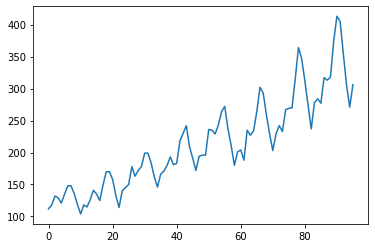

In [18]:
data['Passengers'].plot()

In [19]:
#Linear Model
import statsmodels.formula.api as smf

In [20]:
linear_model=smf.ols('Passengers~t',data=data2).fit()

In [21]:
from math import sqrt

In [22]:
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(data2['t'])))
rmse_linear=np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(pred_linear))**2))
rmse_linear

30.537341252956136

In [23]:
#Exponential
Exp=smf.ols('log_passengers~t',data=data2).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(data2['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

29.63863500223104

In [24]:
#Quadratic
Quad=smf.ols('Passengers~t+t_squared',data=data2).fit()
pred_Quad=pd.Series(Quad.predict(data2[["t","t_squared"]]))
rmse_Quad=np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(pred_Quad)**2)))
rmse_Quad

<ipython-input-24-2faf8567a8c6>:4: RuntimeWarning: invalid value encountered in sqrt
  rmse_Quad=np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(pred_Quad)**2)))


nan

In [25]:
#Additive Seasonality 
add_sea=smf.ols('Passengers~t+t_squared',data=data2).fit()
pred_add_sea=pd.Series(add_sea.predict(data2[["t","t_squared"]]))
rmse_add_sea=np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

29.59097162530025

In [26]:
#Additional Seasonality Quadratic
add_sea_Quad=smf.ols('Passengers~t+t_squared',data=data2).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(data2[["t","t_squared"]]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(data2["Passengers"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.59097162530025

In [27]:
# Multiplicative Seasonality

Mul_sea = smf.ols('Passengers~t+t_squared',data = data2).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(data2))
rmse_Mult_sea = np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1.2143750388772129e+147

In [28]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Passengers~t+t_squared',data = data2).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(data2))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(data2['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

1.2143750388772129e+147

In [29]:
#Compare the results

data3={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data3)p
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,2.959097e+01
4,rmse_add_sea_quad,2.959097e+01
1,rmse_Exp,2.963864e+01
0,rmse_linear,3.053734e+01
5,rmse_Mult_sea,1.214375e+147
6,rmse_Mult_add_sea,1.214375e+147
2,rmse_Quad,NaN


In [36]:
predict_data=data2

In [38]:
predict_data

,Month,Passengers,month,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_passengers
0,1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,8,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,9,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118
93,2002-10-01,306,10,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585
94,2002-11-01,271,11,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,5.602119


In [39]:
#Build the model on entire dataset
model_full=smf.ols('Passengers~t+t_squared',data=data2).fit()

In [40]:
pred_new=pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     119.158137
1     120.460303
2     121.784439
3     123.130544
4     124.498617
         ...    
91    327.618598
92    330.919950
93    334.243270
94    337.588559
95    340.955817
Length: 96, dtype: float64

In [41]:
predict_data["forcasted_Passengers"]=pd.Series(pred_new)

In [42]:
predict_data

,Month,Passengers,month,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,log_passengers,forcasted_Passengers
0,1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499,119.158137
1,1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685,120.460303
2,1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802,121.784439
3,1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812,123.130544
4,1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791,124.498617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,8,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887,327.618598
92,2002-09-01,355,9,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118,330.919950
93,2002-10-01,306,10,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585,334.243270
94,2002-11-01,271,11,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,5.602119,337.588559
